<h1>
  Unemployment and Covid-19 Fatality Rate
</h1>
<h2>
  How covid19 has affected employment in São Paulo (Brazil) and Michigan (USA)?
</h2>

<h3>
Introduction
</h3>
<p>
This work consists of analyzing the relationship between the unemployment rate and the fatality rate of covid 19 in the period from 2020 to 2021.
</p>
<i>We define fatality rate as the percentage of deaths of those infected by the disease.</i>
<p>
Data were extracted from the following sources:
<p><b>São Paulo State - Brazil</b></p>
<ul>
  <li>
    Unemployment data - <a href='https://repositorio.seade.gov.br/dataset/ocupacao-e-rendimento'>https://repositorio.seade.gov.br/dataset/ocupacao-e-rendimento</a>
  </li>
  <li>
    Unemployment data (after 2020) - <a href='https://www.ibge.gov.br/en/statistics/social/labor/16809-quarterly-dissemination-pnad2.html?=&t=downloads'>https://www.ibge.gov.br/en/statistics/social/labor/16809-quarterly-dissemination-pnad2.html?=&t=downloads</a>
  </li>  
  <li>COVID19 data - <a href='https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv'>https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv</a></li>
</ul>
<p><b>Michigan State - USA</b></p>
<ul>
  <li>Unemployment data - <a href='https://fred.stlouisfed.org/series/MIUR'>https://fred.stlouisfed.org/series/MIUR</a></li>
  <li>COVID19 data - <a href='https://github.com/nytimes/covid-19-data/blob/master/us-states.csv'>https://github.com/nytimes/covid-19-data/blob/master/us-states.csv</a></li>
</ul>
</p>

<h3>Sources Description</h3>

<h4>
  Unemployment - São Paulo - Brazil
</h4>

<p>
  File path - /unemployment/taxa_desocupacao_pnad.csv
</p>
<p>  
  The unemployment rate in the State of São Paulo is defined as a percentage of the labor force.<b>(14+ years older)</b>.  
</p>
<p>
  <i>
  You can read more information about this data source at <a href='https://repositorio.seade.gov.br/dataset/91da1a26-e589-4273-8559-651dd5df845b/resource/284138cf-fb43-490c-9ece-010d72fa8994/download/ocupacao_rendimento_metodologia.pdf'>Methodological Annex - Occupation and income</a>.
  </i>
</p>

<h4>
  Unemployment - São Paulo - Brazil (after 2020)
</h4>

<p>
  <ul>
    <li>File path - /unemployment/pnadc_202101_trimestre_novos_indicadores.pdf</li>
    <li>File path - /unemployment/pnadc_202102_trimestre_novos_indicadores.pdf</li>
    <li>File path - /unemployment/pnadc_202103_trimestre_novos_indicadores.pdf</li>
    <li>File path - /unemployment/pnadc_202104_trimestre_novos_indicadores.pdf</li>
  </ul>  
</p>
<p>  
  In 2021, unemployment data began to be released in .pdf files, on the IBGE website at <a href='https://www.ibge.gov.br/en/statistics/social/labor/16809-quarterly-dissemination-pnad2.html?=&t=downloads'>https://www.ibge.gov.br/en/statistics/social/labor/16809-quarterly-dissemination-pnad2.html?=&t=downloads</a>
</p>
<p>
  
</p>
<p>
  <i>
  You can read more information about this data source at <a href='https://www.ibge.gov.br/en/home-eng.html'>Instituto Brasileiro de Geografia e Estatística</a>.
  </i>
</p>

<h4>
  Unemployment - Michigan - USA
</h4>

<p>
  File path - /unemployment/MIUR.csv.csv
</p>
<p>  
  The unemployment rate in the State of Michigan is defined as a percentage of the labor force. <b>(16+ years older)</b>.  
</p>
<p>
  <i>
  You can read more information about this data source at <a href='https://fred.stlouisfed.org/series/UNRATE'>Freed Economic Data</a>.
  </i>
</p>

<h4>
  COVID19 - Cumulative Cases by States in Brazil
</h4>

<p>
  File path - /covid19_data/cases-brazil-states.csv
</p>
<p>  
  Time Series data source compiled by Wesley Cota at GitHub, that contains the cumulative count of COVID cases in Brazil, at the state level.
</p>
<p>
  <i>
  You can read more information about this data source at <a href='https://github.com/wcota/covid19br'>https://github.com/wcota/covid19br</a>
  or <a href='https://covid19br.wcota.me/'>https://covid19br.wcota.me/</a>.
  </i>
</p>


<h4>
  COVID19 - Cumulative Cases by States in USA
</h4>

<p>
  File path - /covid19_data/us-states.csv
</p>
<p>  
  Time Series data source compiled by the New York Times, that contains the cumulative count of COVID cases in USA, at the state level.  
</p>
<p>
  <i>
  You can read more information about this data source at <a href='https://github.com/nytimes/covid-19-data'>https://github.com/nytimes/covid-19-data</a>.
  </i>
</p>


<h3>Load Data Sources</h3>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

unsp = pd.read_csv('unemployment_data/taxa_desocupacao_pnad.csv', encoding='Latin-1', sep=';', decimal=',')
unmi = pd.read_csv('unemployment_data/MIUR.csv')
covsp = pd.read_csv('covid19_data/cases-brazil-states.csv')
covmi = pd.read_csv('covid19_data/us-states.csv')

<h3>Data Transformation and cleaning</h3>

In [46]:
# Unemployment - São Paulo - Brazil

unsp = unsp[unsp['Região'] == 'Estado de São Paulo']
unsp['Data'] = pd.to_datetime(unsp['Data'], format='%d/%m/%Y')
unsp = unsp[unsp['Data'].ge('2019-01-01') & unsp['Data'].le('2020-12-01')]
cols = ['Data','Taxa1']
unsp = unsp[cols]
unsp.rename(columns={'Taxa1':'Unemployment', 'Data': 'date'}, inplace=True)


# Data extract from .pdf files for the 2021 year.
unsp = unsp.append({'date': pd.to_datetime('2021-03-01', format='%Y-%m-%d'), 'Unemployment': 14.60}, ignore_index=True)
unsp = unsp.append({'date': pd.to_datetime('2021-06-01', format='%Y-%m-%d'), 'Unemployment': 14.40}, ignore_index=True)
unsp = unsp.append({'date': pd.to_datetime('2021-09-01', format='%Y-%m-%d'), 'Unemployment': 13.40}, ignore_index=True)
unsp = unsp.append({'date': pd.to_datetime('2021-12-01', format='%Y-%m-%d'), 'Unemployment': 11.10}, ignore_index=True)
unsp['Unemployment'] = np.round(unsp['Unemployment'],2)

# Unemployment - Michigan - USA

unmi['DATE'] = pd.to_datetime(unmi['DATE'], format='%Y-%m-%d')
unmi.rename(columns={'DATE': 'date', 'MIUR': 'Unemployment'}, inplace=True)
unmi = unmi.groupby(pd.Grouper(key='date', freq='QS-MAR')).agg({'Unemployment': (np.mean)})
unmi.reset_index(inplace=True)
unmi = unmi[unmi['date'].ge('2019-01-01') & unmi['date'].le('2021-12-01')]
unmi['Unemployment'] = unmi['Unemployment'].apply(lambda x: np.round(x,2))
unmi.reset_index(inplace=True)
unmi = unmi[['date','Unemployment']]


# COVID 19 - São Paulo - Brazil

covsp = covsp[covsp['state'] == 'SP']
covsp['date'] = pd.to_datetime(covsp['date'], format='%Y-%m-%d')
covsp = covsp[['date','newCases','newDeaths']]
covsp = covsp.groupby(pd.Grouper(key='date', freq='QS-MAR')).agg({'newCases': (np.sum), 'newDeaths': (np.sum)})
covsp['totalCases'] = covsp['newCases'].cumsum()
covsp['totalDeaths'] = covsp['newDeaths'].cumsum()
covsp['Fatality COVID19'] = np.round((covsp['totalDeaths']/covsp['totalCases'])*100,2)
covsp.reset_index(inplace=True)

# COVID 19 - Michigan - USA

covmi = covmi[covmi['state'] == 'Michigan']
covmi['date'] = pd.to_datetime(covmi['date'], format='%Y-%m-%d')
cols=['date','cases','deaths']
covmi = covmi[cols]
days = ['2020-03-31','2020-06-03','2020-09-30','2020-12-31','2021-03-31','2021-06-03','2021-09-30','2021-12-31']
df = pd.DataFrame()
for d in days:
  df = df.append(covmi[covmi['date'].eq(d)])
covmi = df
covmi['date'] = covmi['date'] - pd.offsets.MonthBegin()
covmi['Fatality COVID19'] = np.round((covmi['deaths']/covmi['cases'])*100,2)


covmi = covmi[covmi['date'].ge('2020-01-01') & covmi['date'].le('2021-12-31')]
covsp = covsp[covsp['date'].ge('2020-01-01') & covsp['date'].le('2021-12-31')]

covsp.reset_index(inplace=True)
covmi.reset_index(inplace=True)

cols = ['date','Fatality COVID19']

covsp = covsp[cols]
covmi = covmi[cols]

uncovsp = pd.merge(covsp,unsp,how='right',left_on='date',right_on='date')
uncovsp['Fatality COVID19'] = uncovsp['Fatality COVID19'].fillna(0)
uncovsp = uncovsp.set_index('date')

uncovmi = pd.merge(covmi,unmi,how='right',left_on='date',right_on='date')
uncovmi['Fatality COVID19'] = uncovmi['Fatality COVID19'].fillna(0)
uncovmi = uncovmi.set_index('date')



In [48]:
uncovsp.head(11)

,Fatality COVID19,Unemployment
date,,
2019-03-01,0.00,13.6
2019-06-01,0.00,12.9
2019-09-01,0.00,12.1
2019-12-01,0.00,11.6
2020-03-01,6.94,12.3
2020-06-01,3.73,13.9
2020-09-01,3.39,15.4
2020-12-01,2.91,14.8
2021-03-01,3.40,14.6


In [4]:
uncovmi.head(11)

,Fatality COVID19,Unemployment
date,,
2019-03-01,0.00,4.10
2019-06-01,0.00,4.20
2019-09-01,0.00,4.00
2019-12-01,0.00,3.80
2020-03-01,3.46,15.23
2020-06-01,9.46,12.37
2020-09-01,5.13,7.77
2020-12-01,2.47,6.57
2021-03-01,2.30,6.20


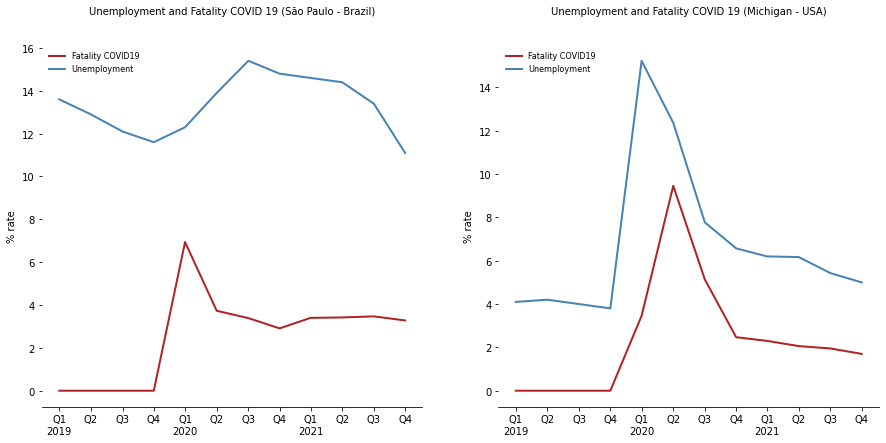

In [51]:
plt.figure(figsize=(15,8))

plt.subplots_adjust(bottom=0.25)

plt.subplot(1,2,1)

# Create lists of quarter ticks and tick labels using the DatetimeIndex timestamps (ts)
ticks = uncovsp.index[uncovsp.index.month%3 == 0]
labels = [f'Q{int(ts.month/3)}\n{ts.year}' if ts.month == 3
          else f'Q{int(ts.month/3)}' for ts in ticks]

line1, = plt.plot(uncovsp.index, uncovsp['Fatality COVID19'], label='Fatality COVID19', color='#B22222', linewidth=2)
line2, = plt.plot(uncovsp.index, uncovsp['Unemployment'], label='Unemployment', color='#4682B4', linewidth=2)

ax = plt.gca()

# Set quarter major ticks with labels and monthly minor ticks without labels
ax.set_xticks(ticks)
ax.set_xticks(uncovsp.index, minor=True)
ax.set_xticklabels(labels)

ax.set_ylabel('% rate', fontsize=10, labelpad=5)
ax.set_xlabel('', fontsize=10, labelpad=5)
ax.set_title('Unemployment and Fatality COVID 19 (São Paulo - Brazil)', fontsize=10, pad=30)
plt.legend(loc=2, fontsize=8, frameon=False)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.subplot(1,2,2)

# Create lists of quarter ticks and tick labels using the DatetimeIndex timestamps (ts)
ticks = uncovmi.index[uncovmi.index.month%3 == 0]
labels = [f'Q{int(ts.month/3)}\n{ts.year}' if ts.month == 3
          else f'Q{int(ts.month/3)}' for ts in ticks]

line3, = plt.plot(uncovmi.index, uncovmi['Fatality COVID19'], label='Fatality COVID19', color='#B22222', linewidth=2)
line4, = plt.plot(uncovmi.index, uncovmi['Unemployment'], label='Unemployment', color='#4682B4', linewidth=2)

ax = plt.gca()

# Set quarter major ticks with labels and monthly minor ticks without labels
ax.set_xticks(ticks)
ax.set_xticks(uncovmi.index, minor=True)
ax.set_xticklabels(labels)

ax.set_ylabel('% rate', fontsize=10, labelpad=5)
ax.set_xlabel('', fontsize=10, labelpad=5)
ax.set_title('Unemployment and Fatality COVID 19 (Michigan - USA)', fontsize=10, pad=30)
plt.legend(loc=2, fontsize=8, frameon=False)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


<h3>Conclusion</h3>
<p>
We can see through the graphs that both São Paulo and Michigan had their unemployment rates affected by COVID. We chose the fatality rate to try to explain this effect.
</p>
<p>
When this rate increased during the first quarter of 2020, it caused the unemployment rate to rise in both São Paulo and Michigan.
However, after the fatality rate dropped, the resumption of employment occurs much faster in Michigan than in São Paulo.
For São Paulo, despite the fatality rate remaining almost constant, unemployment begins to decrease slowly, only from the third quarter of 2020.
</p>
<p>
It is important to note that although the recovery in São Paulo was slower than in Michigan, the variation in the unemployment rate was much greater in Michigan than in São Paulo.
</p>
<p>
We can see in the second graph that Michigan had a much bigger jump in the unemployment rate, from 4% to 15%, while São Paulo, which already had a high unemployment rate of 12.1%, reached a high of 15.4%.
</p>